# Sample code
Here is some codes for how to use the given scritps to predict emissivity.

First, let's load some required packages.

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from labellines import labelLine
from emis import get_emis

Now, set up for the plot.

In [19]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
# BIGGER_SIZE = 14
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams["xtick.bottom"]=True
plt.rcParams["ytick.left"]=True

Predict a single value.

In [16]:
p_t = 1.0 # bar
T = 300.0 # K
pL = 10.0
x_h2o = 0.3
x_co2 = 0.2
x_co = 0.1
print(get_emis(np.array([[p_t, T, pL, x_h2o, x_co2, x_co]])))

1/1 [==============================] - 0s 21ms/step
[[0.23156847]]


Predict a series emissivity and plot them in a chart.

4/4 [==============================] - 0s 7ms/step


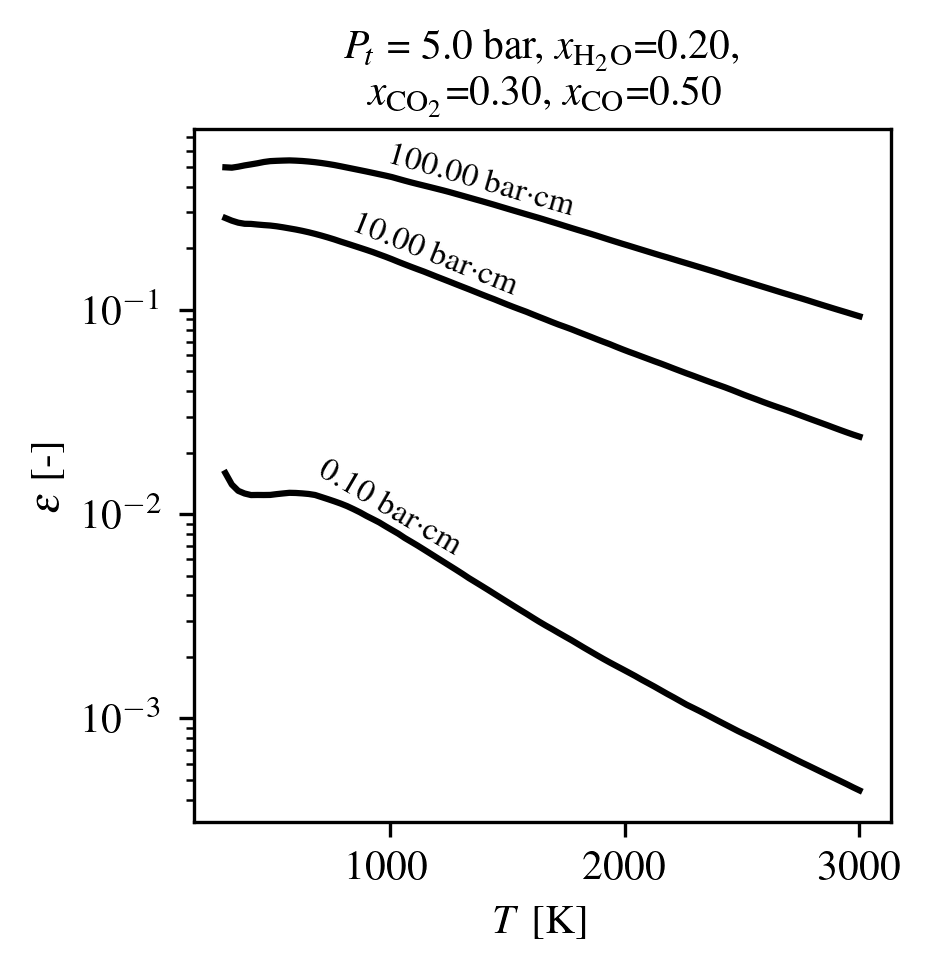

In [36]:
p_t = 5.0 # bar
Ts = np.linspace(300.0, 3000.0, 100)
pLs = [0.1, 10.0, 100.0]
x_h2o = 0.2
x_co2 = 0.3
x_co = 0.5

xs = np.zeros([len(Ts), 6])
xs[:, [0, 3, 4, 5]] = [p_t, x_h2o, x_co2, x_co]
xs[:, 1] = Ts

fig = plt.figure(figsize=[3, 3])
ax = fig.add_subplot()
for i, pL in enumerate(pLs):
    xs[:, 2] = pL
    emiss = get_emis(xs.copy())
    line, = ax.plot(Ts, emiss, color="black")
    labelLine(line, 1000+i*200, label=f"{pL:.2f} bar$\cdot$cm", size=8,
            yoffset_logspace=True, yoffset=0.1, outline_color=None, color="black")
_ = ax.set_yscale("log")
_ = ax.set_xlabel("$T$ [K]")
_ = ax.set_ylabel("$\epsilon$ [-]")
_ = ax.set_title(f"$P_t$ = {p_t} bar, $x_\\mathrm{{H_2O}}$={x_h2o:.2f},"
        f"\n$x_\\mathrm{{CO_2}}$={x_co2:.2f}, $x_\\mathrm{{CO}}$={x_co:.2f}")